## About

**Notebook Overview**

This notebook involves analyzing and processing a subset of a larger dataset, specifically focusing on data hosted on Kaggle. The work entails selecting a specific portion of the data (30%), which is used for detailed analysis and image processing tasks.

**Key Steps and Technologies Used**

1. **Data Acquisition**: Data is accessed through a Kaggle API, requiring setup and authentication via user API tokens.
2. **Data Handling**: A targeted approach is used to select a portion of the dataset for analysis. The data is then processed using various Python libraries, indicating a mix of data manipulation and image processing tasks.
3. **Computational Tools**: The notebook utilizes Python programming, leveraging libraries such as OpenCV for image operations, NumPy for numerical data manipulation, and Matplotlib for visualization. Execution is carried out in a Google Colab environment, which provides the necessary computational resources.
4. **Storage and Management**: Data is systematically saved and managed on a cloud drive, ensuring that large files are handled efficiently.

**Objective**

The objective is to efficiently manage and process data for analysis, making use of cloud-based tools and advanced programming techniques to handle images and numerical data effectively.

## Introduction

**Arabic Sign Language**

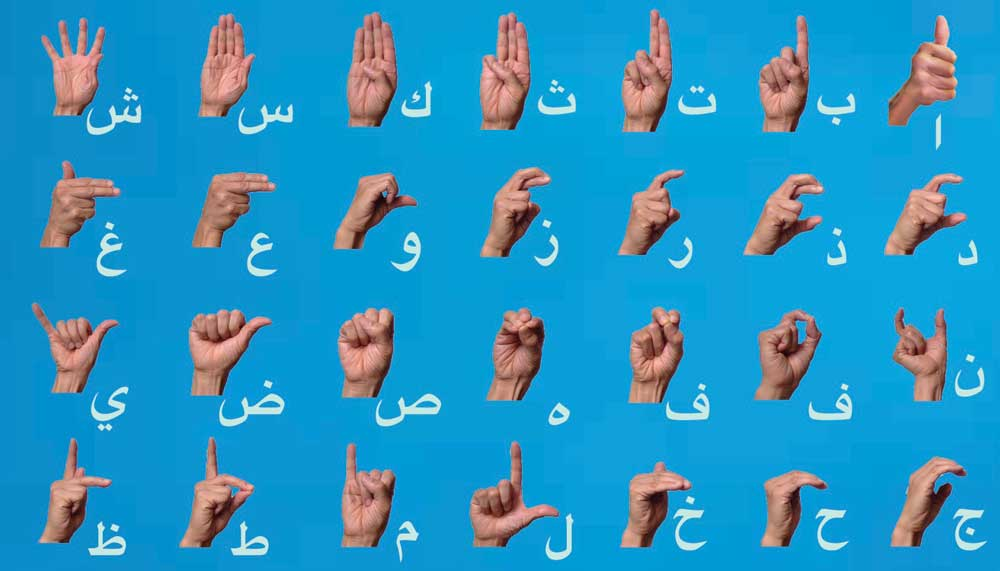

Because of the limited resources, we will work on 30% of the data only (8 letters)



```
['Seen', 'Sheen', 'Lam', 'Zain', 'Meem', 'Waw', 'Yeh', 'Reh']
```



## Setting Up

In [ ]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
from PIL import Image

In [ ]:
from google.colab import files

In [ ]:
import shutil

In [ ]:
!pip install Pillow

## Getting Data

First, you need to have a Kaggle account. If you don't have one, create it at Kaggle. Then, you need to obtain your Kaggle API token:

1.   Go to your Kaggle account settings.
2.   Scroll down to the API section and click on “Create New API Token”.
3. A file named kaggle.json will be downloaded. This file contains your username and API key.

In [ ]:
files.upload()  # Use this to upload kaggle.json (Choose it from your pc)

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mariamelseedawy","key":"6a958ee7f493a04334d37d1b0272d11c"}'}

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammadalbrham/rgb-arabic-alphabets-sign-language-dataset

100% 4.72G/4.72G [01:01<00:00, 164MB/s]
100% 4.72G/4.72G [01:02<00:00, 81.8MB/s]


In [ ]:
!unzip rgb-arabic-alphabets-sign-language-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: RGB ArSL dataset/Kaf/Kaf_140.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_141.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_142.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_143.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_144.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_145.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_146.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_147.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_148.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_149.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_15.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_150.jpeg  
  inflating: RGB ArSL dataset/Kaf/Kaf_151.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_152.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_153.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_154.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_155.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_156.jpg  
  inflating: RGB ArSL dataset/Kaf/Kaf_157.jpg  
  inflating: RGB ArSL dataset/Kaf

## Getting 30% of the data

In [ ]:
# Path to the base directory
base_path = '/content/RGB ArSL dataset'

# List of folder names to keep
folders_to_keep = ['Seen', 'Sheen', 'Lam', 'Zain', 'Meem', 'Waw', 'Yeh', 'Reh']

# Loop through each item in the base directory
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    # Check if the item is a directory and not in the list of folders to keep
    if os.path.isdir(folder_path) and folder_name not in folders_to_keep:
        # Delete the directory
        shutil.rmtree(folder_path)
        print(f"Deleted {folder_path}")
    else:
        print(f"Kept {folder_path}")

Deleted /content/RGB ArSL dataset/Beh
Kept /content/RGB ArSL dataset/Seen
Kept /content/RGB ArSL dataset/Lam
Deleted /content/RGB ArSL dataset/Noon
Deleted /content/RGB ArSL dataset/Khah
Deleted /content/RGB ArSL dataset/Qaf
Kept /content/RGB ArSL dataset/Zain
Deleted /content/RGB ArSL dataset/Ghain
Kept /content/RGB ArSL dataset/Yeh
Kept /content/RGB ArSL dataset/Sheen
Deleted /content/RGB ArSL dataset/Sad
Deleted /content/RGB ArSL dataset/Dad
Deleted /content/RGB ArSL dataset/Tah
Deleted /content/RGB ArSL dataset/Feh
Deleted /content/RGB ArSL dataset/Dal
Deleted /content/RGB ArSL dataset/Hah
Kept /content/RGB ArSL dataset/Meem
Deleted /content/RGB ArSL dataset/Heh
Deleted /content/RGB ArSL dataset/Laa
Deleted /content/RGB ArSL dataset/Ain
Deleted /content/RGB ArSL dataset/Teh
Kept /content/RGB ArSL dataset/Waw
Deleted /content/RGB ArSL dataset/Teh_Marbuta
Kept /content/RGB ArSL dataset/Reh
Deleted /content/RGB ArSL dataset/Thal
Deleted /content/RGB ArSL dataset/Jeem
Deleted /content/

## Resizing the images [4k->256*256]

In [ ]:
# Function to resize images in a folder and save to a new folder
def resize_and_save_images(source_folder, target_folder, size=(256, 256)):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)  # Create target directory if it doesn't exist

    for filename in os.listdir(source_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(source_folder, filename)
            try:
                with Image.open(img_path) as img:
                    img_resized = img.resize(size)
                    img_resized.save(os.path.join(target_folder, filename))  # Save in new folder
            except Exception as e:
                print(f"Error resizing image {img_path}: {e}")

In [ ]:
# Base directory where the folders containing the images are located
base_path = '/content/RGB ArSL dataset'  # Replace with your actual base path

# New base directory where the resized images will be saved
new_base_path = '/content/Resized_RGB_ArSL_dataset'  # Replace with your desired new base path

# Iterate over each subfolder in the base directory
for folder_name in os.listdir(base_path):
    source_folder_path = os.path.join(base_path, folder_name)
    target_folder_path = os.path.join(new_base_path, folder_name)

    # Check if it's a directory before processing
    if os.path.isdir(source_folder_path):
        resize_and_save_images(source_folder_path, target_folder_path)

print("Resizing completed and images are saved in the new directory.")

Error resizing image /content/RGB ArSL dataset/Yeh/Yeh_61.jpg: image file is truncated (7 bytes not processed)
Resizing completed and images are saved in the new directory.


## Save on drive

### Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Save Images

In [ ]:
# Define the path to the folder you want to copy
source_folder = "/content/Resized_RGB_ArSL_dataset"

# Define the destination path on the shared drive
# Make sure to have the shared drive mounted or available in your drive.
destination_folder = "/content/drive/Shared drives/Computer Vision/Data/Resized_RGB_ArSL_dataset"

# Use the shutil library to copy the entire folder
shutil.copytree(source_folder, destination_folder)

'/content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset'

### Save NumPys

In [ ]:
def save_images_as_arrays(root_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Traverse the root directory
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Construct full file path
                file_path = os.path.join(subdir, file)
                # Load the image
                image = Image.open(file_path)
                # Convert the image to a numpy array
                image_array = np.array(image)
                # Save the numpy array to a file
                array_path = os.path.join(output_dir, file + '.npy')
                np.save(array_path, image_array)
                print(f"Saved {array_path}")

In [ ]:
# Define the path to the folder you want to copy
source_folder = "/content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset"

# Define the destination path on the shared drive
# Make sure to have the shared drive mounted or available in your drive.
destination_folder = "/content/drive/Shared drives/Computer Vision/Data/Resized_RGB_ArSL_dataset_numpy"

# Usage
save_images_as_arrays(source_folder, destination_folder)

Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_133.jpg.npy
Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_207.jpg.npy
Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_179.jpeg.npy
Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_87.jpg.npy
Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_22.jpg.npy
Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_164.jpg.npy
Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_68.jpeg.npy
Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_231.jpg.npy
Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_71.jpg.npy
Saved /content/drive/Shared drives/Computer Vision/Resized_RGB_ArSL_dataset_numpy/Seen_6.jpg.npy
Saved /content